In [1]:
# Download Source Data

list.files(path = "../input/retailtransactiondata")

[1] "Retail_Data_Response.csv"     "Retail_Data_Transactions.csv"

In [2]:
# Import packages for R
library(tidyverse)
library(rfm)
library(magrittr)
library(lubridate)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
#Import Datasets

response <-read.csv("../input/retailtransactiondata/Retail_Data_Response.csv", header=TRUE, sep=",")
transactions <-read.csv("../input/retailtransactiondata/Retail_Data_Transactions.csv", header=TRUE, sep=",")

In [4]:
# Checking For Null Values

colSums(is.na(transactions))
head(transactions)

# Changing Formats

transactions <- transactions %>%
  mutate(
    customer_id = as.character(customer_id),
    trans_date= as.Date(trans_date, "%d-%b-%y"), 
    tran_amount = as.numeric(tran_amount)
  )
str(transactions)
transactions %>%
  group_by(trans_date) %>%
 summarise(customer_id)%>% arrange(customer_id)


customer_id  trans_date tran_amount 
          0           0           0

,customer_id,trans_date,tran_amount
,<chr>,<chr>,<int>
1,CS5295,11-Feb-13,35
2,CS4768,15-Mar-15,39
3,CS2122,26-Feb-13,52
4,CS1217,16-Nov-11,99
5,CS1850,20-Nov-13,78
6,CS5539,26-Mar-14,81


'data.frame':	125000 obs. of  3 variables:
 $ customer_id: chr  "CS5295" "CS4768" "CS2122" "CS1217" ...
 $ trans_date : Date, format: "2013-02-11" "2015-03-15" ...
 $ tran_amount: num  35 39 52 99 78 81 93 89 76 75 ...


`summarise()` has grouped output by 'trans_date'. You can override using the `.groups` argument.



trans_date,customer_id
<date>,<chr>
2011-06-15,CS1112
2011-08-19,CS1112
2011-10-02,CS1112
2012-04-08,CS1112
2012-06-24,CS1112
2012-07-03,CS1112
2012-09-16,CS1112
2012-12-15,CS1112
2013-03-01,CS1112


In [5]:
analysis_date <- lubridate::as_date('2015-03-16')
Recency_days = (analysis_date -transactions$trans_date)
head(Recency_days,8)

Time differences in days
[1]  763    1  748 1216  481  355 1134   45

# Calculation of Recency Score, Frequency Score,Monetary Score

## RFM Table

In [6]:

rfm_result <- rfm_table_order(transactions, customer_id, trans_date, tran_amount, analysis_date)
head(rfm_result$rfm,10)

customer_id,date_most_recent,recency_days,transaction_count,amount,recency_score,frequency_score,monetary_score,rfm_score
<chr>,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
CS1112,2015-01-14,61,15,1012,3,2,2,322
CS1113,2015-02-09,35,20,1490,4,3,4,434
CS1114,2015-02-12,32,19,1432,4,3,4,434
CS1115,2015-03-05,11,22,1659,5,4,5,545
CS1116,2014-08-25,203,13,857,1,1,2,112
CS1117,2014-07-02,257,17,1185,1,2,3,123
CS1118,2015-03-14,2,15,1011,5,2,2,522
CS1119,2015-03-05,11,15,1158,5,2,3,523
CS1120,2015-03-06,10,24,1677,5,5,5,555


## Heat Map

>The heat map shows the average monetary value for different categories of recency and frequency scores. Higher scores of frequency and recency are characterized by higher average monetary value as indicated by the darker areas in the heatmap.

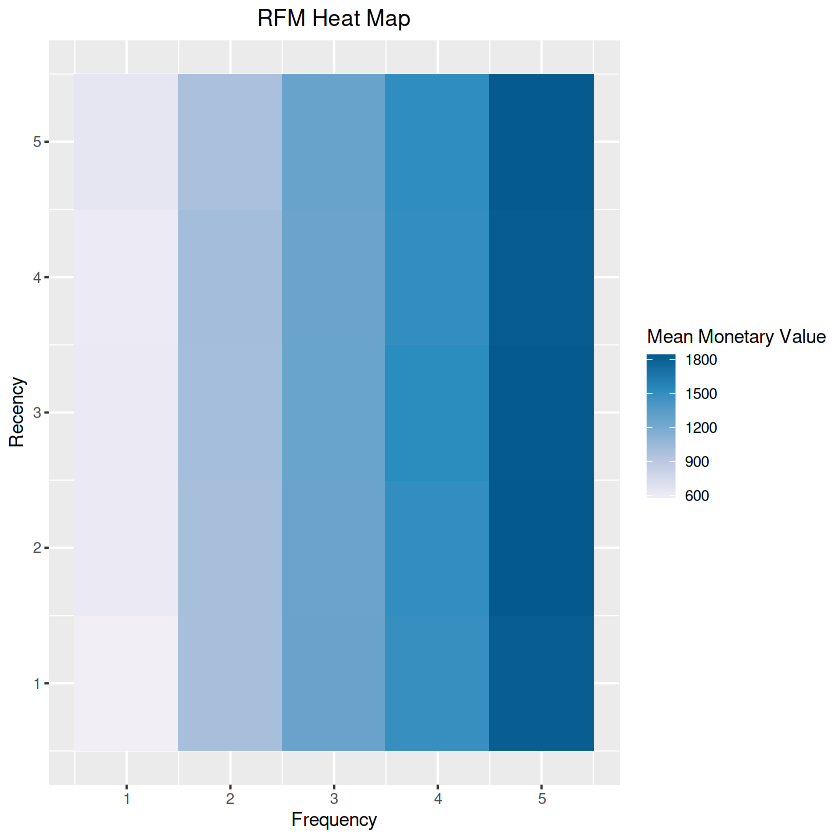

In [7]:
rfm_heatmap(rfm_result)

## Bar Chart

>To generate the distribution of monetary scores for the different combinations of frequency and recency scores.

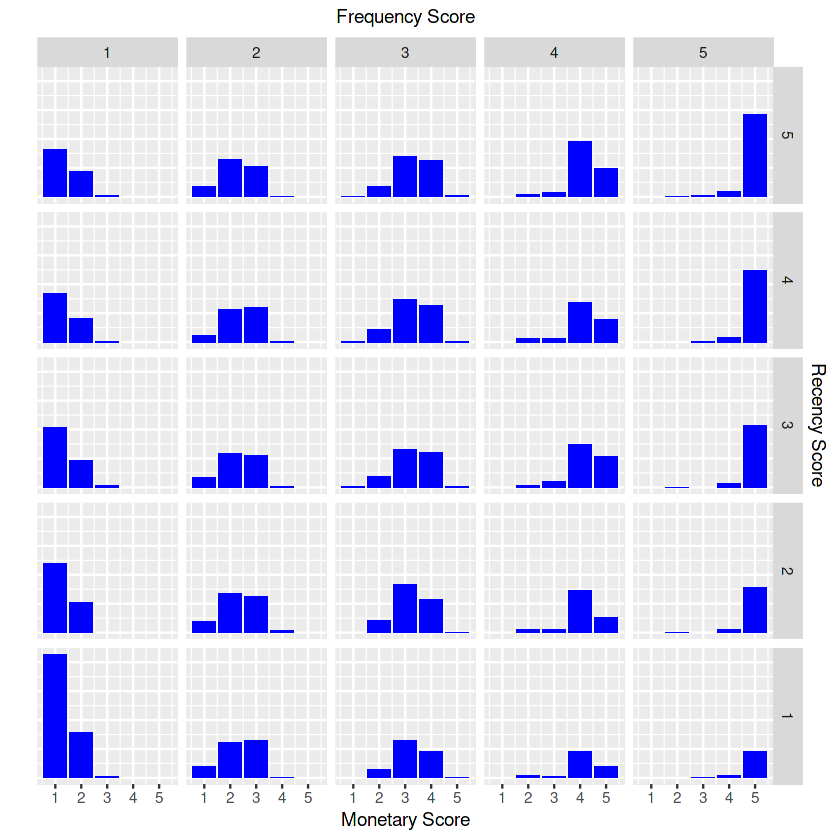

In [8]:
rfm_bar_chart(rfm_result) 

## Histogram

>>to examine the relative distribution of :
>>
>* monetary value (total revenue generated by each customer)
>* recency days (days since the most recent visit for each customer)
>* frequency (transaction count for each customer)

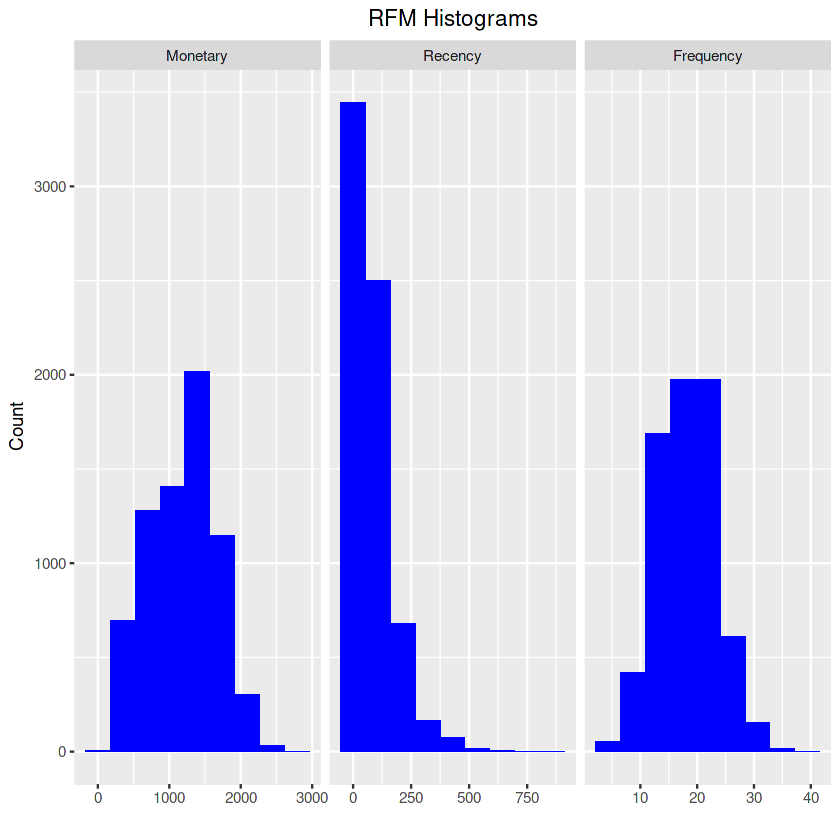

In [9]:
rfm_histograms(rfm_result)

## Scatter Plot

>>The best customers are those who:
>>
>* bought most recently
>* most often
>* and spend the most

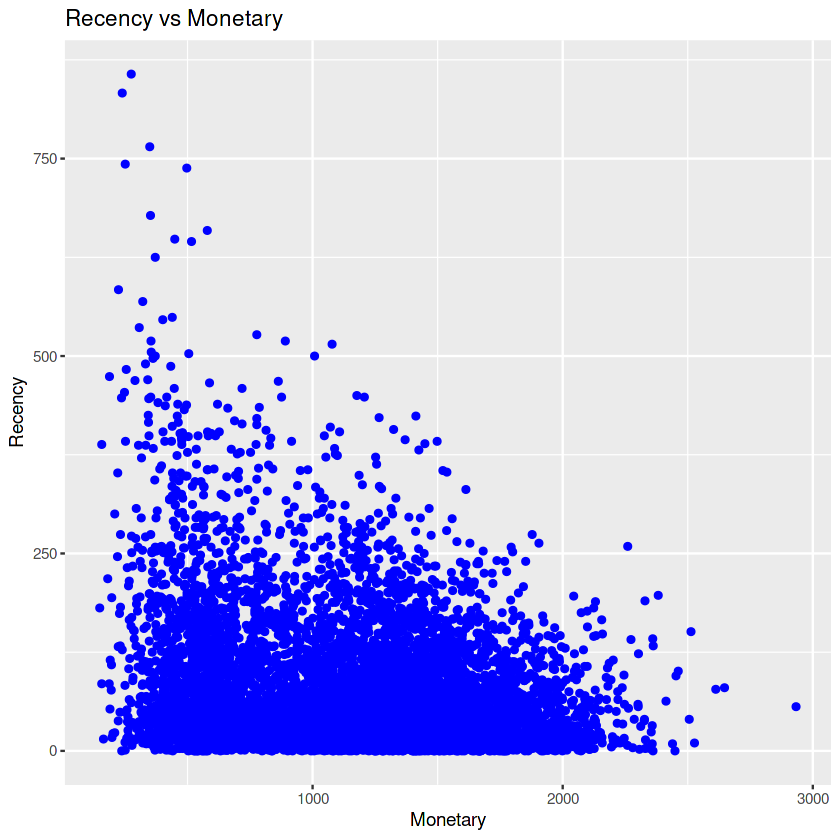

In [10]:
rfm_rm_plot(rfm_result)

## Frequency vs Monetary

> As the customer transaction amount increases their is increase in the revenue amount 

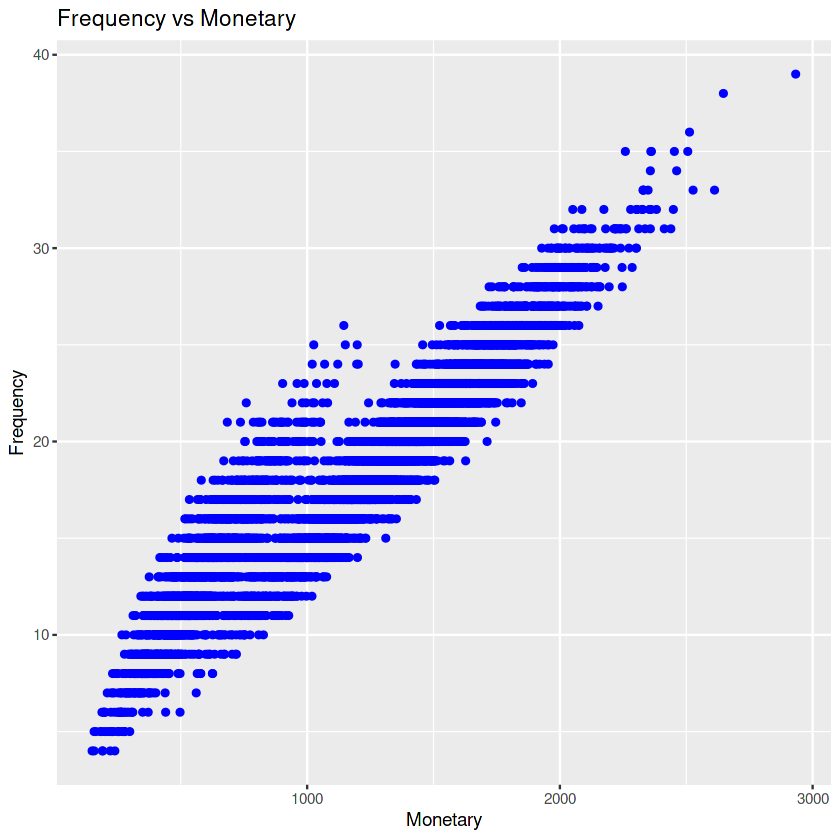

In [11]:
rfm_fm_plot(rfm_result)

## Recency vs Frequency

> Low frequency of transactions with lower recency of  custermer likely to return less, recency of transactions increases with frequency
decreases but customer likely to return more ,

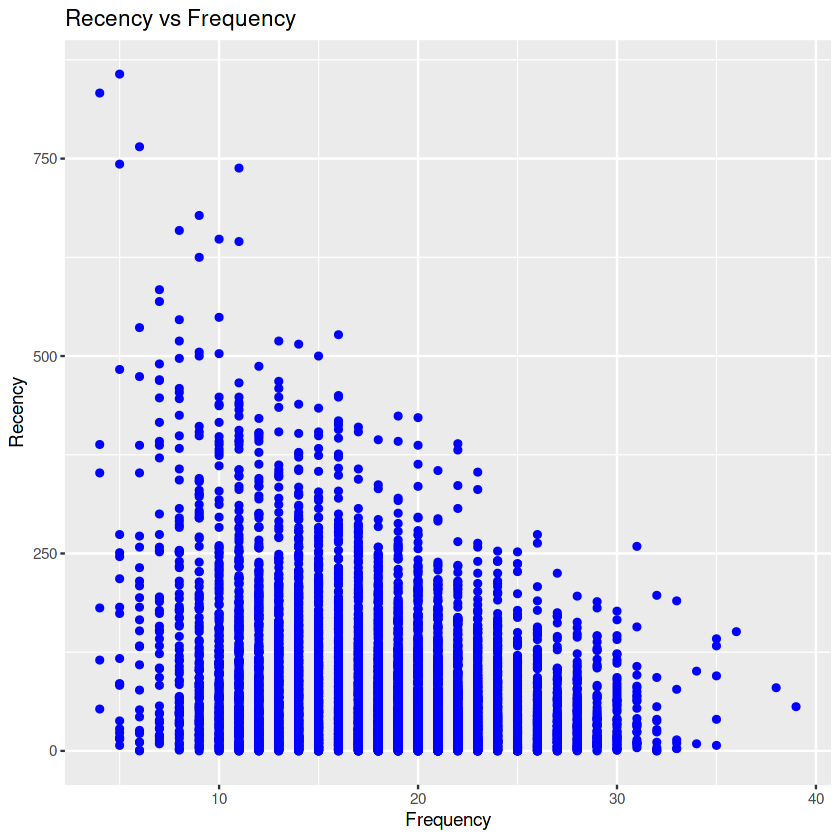

In [12]:
rfm_rf_plot(rfm_result)

## Segments

In [13]:
# Naming the segments

segment_names <- c("Champions", "Loyal Customers", "Potential Loyalist",
  "New Customers", "Promising", "Need Attention", "About To Sleep",
  "At Risk", "Can't Lose Them", "Lost")


# Setting levels for each segment

recency_lower <- c(4, 2, 3, 4, 3, 2, 2, 1, 1, 1)
recency_upper <- c(5, 5, 5, 5, 4, 3, 3, 2, 1, 2)
frequency_lower <- c(4, 3, 1, 1, 1, 2, 1, 2, 4, 1)
frequency_upper <- c(5, 5, 3, 1, 1, 3, 2, 5, 5, 2)
monetary_lower <- c(4, 3, 1, 1, 1, 2, 1, 2, 4, 1)
monetary_upper <- c(5, 5, 3, 1, 1, 3, 2, 5, 5, 2)


# Grouping Segments 

segments <- rfm_segment(rfm_result, segment_names, recency_lower,
recency_upper, frequency_lower, frequency_upper, monetary_lower,
monetary_upper)

head(segments)

customer_id,segment,rfm_score,transaction_count,recency_days,amount,recency_score,frequency_score,monetary_score
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
CS1112,Potential Loyalist,322,15,61,1012,3,2,2
CS1113,Loyal Customers,434,20,35,1490,4,3,4
CS1114,Loyal Customers,434,19,32,1432,4,3,4
CS1115,Champions,545,22,11,1659,5,4,5
CS1116,Lost,112,13,203,857,1,1,2
CS1117,At Risk,123,17,257,1185,1,2,3


## Visualization of Segments

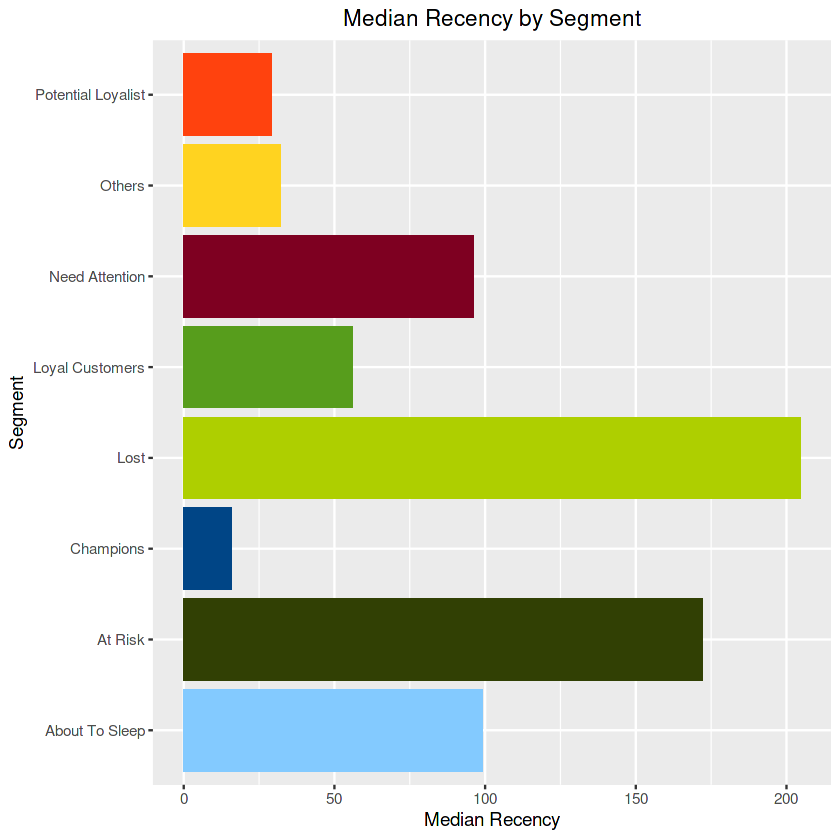

In [14]:
rfm_plot_median_recency(segments)

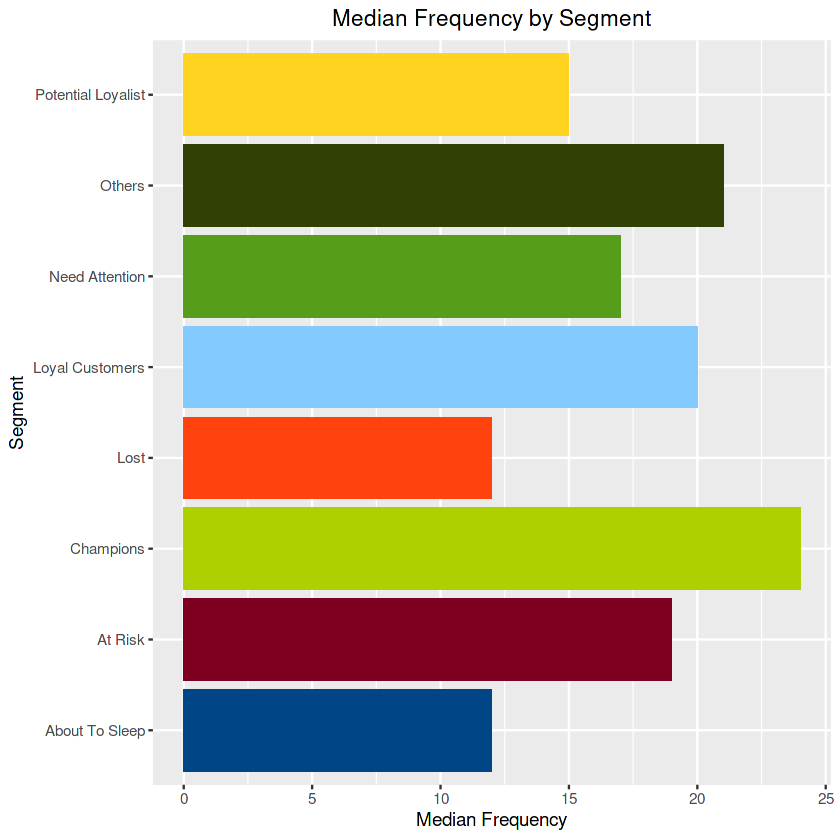

In [15]:
rfm_plot_median_frequency(segments)

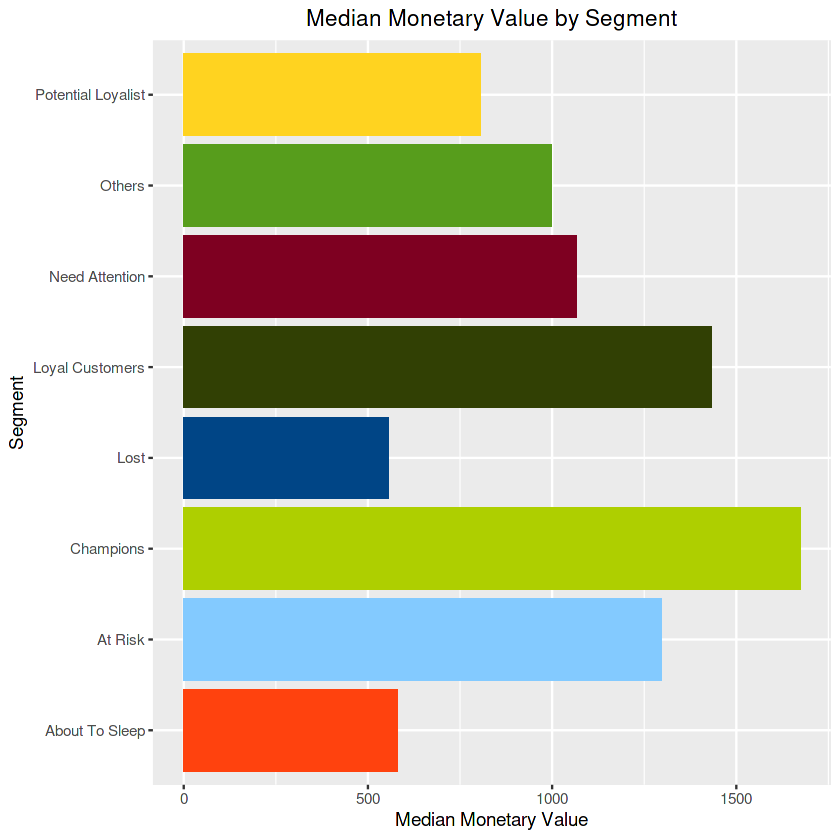

In [16]:
rfm_plot_median_monetary(segments)

## Segment Size


In [17]:
segments%>%
count(segment)%>%
arrange(desc(n))%>% 
rename(Segment = segment, Count = n)

Segment,Count
<chr>,<int>
Loyal Customers,1990
Potential Loyalist,1720
Champions,1069
At Risk,764
Lost,624
About To Sleep,380
Need Attention,303
Others,39
